In [1]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from queue import Queue

In [2]:
def mser(img):
  height,width=np.shape(img)
  visited=np.zeros((height,width),dtype=bool)
  seed=[]
  delta=3
  for i in range(1,height-1):
    for j in range(1,width-1):
      if not visited[i][j]:
        q=Queue()
        q.put((i,j))
        c=0
        while not q.empty():
          x,y=q.get()
          c+=1
          visited[x,y]=True
          if (x-1>=0 and visited[x-1,y]==0 and img[x-1,y]<=delta+img[x,y] and img[x-1,y]>=img[x,y]-delta):
            q.put((x-1,y))
            visited[x-1,y]=True
          if (x+1<height and visited[x+1,y]==0 and img[x+1][y]<=delta+img[x][y] and img[x+1][y]>=img[x][y]-delta):
            q.put((x+1,y))
            visited[x+1,y]=True
          if (y-1>=0 and visited[x,y-1]==0 and img[x][y-1]<=delta+img[x][y] and img[x][y-1]>=img[x][y]-delta):
            q.put((x,y-1))
            visited[x,y-1]=True
          if (y+1<width and visited[x][y+1]==0 and img[x][1+y]<=delta+img[x][y] and img[x][1+y]>=img[x,y]-delta):
            q.put((x,y+1))
            visited[x,y+1]=True
        if c > 1500 and c<25000:
          seed.append((i,j))
  #return len(seed)
  mser_binary=np.zeros((height,width))
  visited=np.zeros((height,width),dtype=bool)
  for p,r in seed:
    q=Queue()
    q.put((p,r))
    while not q.empty():
      x,y=q.get()
      visited[x,y]=True
      mser_binary[x][y]=1
      if (x-1>=0 and visited[x-1,y]==0 and img[x-1,y]<=delta+img[x,y] and img[x-1,y]>=img[x,y]-delta):
        q.put((x-1,y))
        visited[x-1,y]=True
      if (x+1<height and visited[x+1,y]==0 and img[x+1][y]<=delta+img[x][y] and img[x+1][y]>=img[x][y]-delta):
        q.put((x+1,y))
        visited[x+1,y]=True
      if (y-1>=0 and visited[x,y-1]==0 and img[x][y-1]<=delta+img[x][y] and img[x][y-1]>=img[x][y]-delta):
        q.put((x,y-1))
        visited[x,y-1]=True
      if (y+1<width and visited[x][y+1]==0 and img[x][1+y]<=delta+img[x][y] and img[x][1+y]>=img[x,y]-delta):
        q.put((x,y+1))
        visited[x,y+1]=True
  
  t=threshold_otsu(img)
  otsu_binary=img
  np.where(otsu_binary>t,255,0)
  return mser_binary,otsu_binary,len(seed)




In [3]:
path='/content/drive/MyDrive/DIP/Assignment01/'
image = io.imread(path+'/input/DoubleColorText_Gray.png')
mser_binary,otsu_binary,mser_comp= mser(image)

io.imshow(mser_binary*255,cmap='gray')
print(mser_comp)
plt.imsave(path+'mser_binary.png',mser_img)
#io.imsave(outdir+'6_otsuimg.png',otsu_img)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


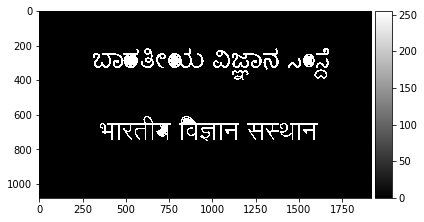

In [4]:
io.imshow(mser_binary*255,cmap='gray')